In [14]:
%matplotlib inline
from sklearn import tree
from sklearn.tree import plot_tree
from sklearn.metrics import precision_score, recall_score, f1_score,accuracy_score, roc_curve, auc, confusion_matrix
from sklearn.model_selection import GridSearchCV, train_test_split, cross_val_score
from sklearn.ensemble import RandomForestClassifier
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import math
import numpy as np

data = pd.read_csv(r'C:\Users\Валерий\Desktop\питон\CSV_EXCEL\space_can_be_a_dangerous_place.csv')
data

,r,phi,peradventure_index,dustiness,black_hole_is_near,buggers_were_noticed,nearby_system_has_planemo,dangerous
0,169.1,138.0,22.3212,0.706285,0,1,1,1
1,11.1,148.0,1.4652,-0.410512,1,1,1,1
2,274.6,201.0,36.2472,0.756457,1,1,1,1
3,172.8,173.0,22.8096,0.035221,1,1,1,1
4,223.3,222.0,29.4756,0.197271,0,1,1,1
...,...,...,...,...,...,...,...,...
99995,301.7,249.0,39.8244,0.397064,0,1,1,1
99996,194.0,350.0,25.6080,-1.062202,0,1,1,1
99997,201.4,112.0,26.5848,1.571040,0,1,1,1
99998,7.8,115.0,1.0296,-1.206575,0,1,1,1


In [15]:
X = data.drop(['dangerous',"r"], axis=1)  # Dataset bilding
X = pd.get_dummies(X, dtype=int)
y = data["dangerous"]

x_train, x_test, y_train, y_test = train_test_split(X, y, test_size=0.33) # Разбиваем наши датасеты на группы в отношении test_size

X

,phi,peradventure_index,dustiness,black_hole_is_near,buggers_were_noticed,nearby_system_has_planemo
0,138.0,22.3212,0.706285,0,1,1
1,148.0,1.4652,-0.410512,1,1,1
2,201.0,36.2472,0.756457,1,1,1
3,173.0,22.8096,0.035221,1,1,1
4,222.0,29.4756,0.197271,0,1,1
...,...,...,...,...,...,...
99995,249.0,39.8244,0.397064,0,1,1
99996,350.0,25.6080,-1.062202,0,1,1
99997,112.0,26.5848,1.571040,0,1,1
99998,115.0,1.0296,-1.206575,0,1,1


In [16]:
clf = tree.DecisionTreeClassifier()  # Создаём объект класификатор

parameters = {"criterion": ['gini', 'entropy'], 'max_depth': range(1,10)}   # Параметры для класификатора

grid_search_cv_clf = GridSearchCV(clf, parameters, cv=5)  # Прокачиваем классификатор (создаём новый объект) и задаём степень кросс валидации

grid_search_cv_clf.fit(x_train, y_train)  # Обучаем модель

print(grid_search_cv_clf.best_params_)  # Параметры для clf с лучшим score

best_clf = grid_search_cv_clf.best_estimator_  # Выбираем clf с лучшим score

print(precision_score(y_test, best_clf.predict(x_test)))
print(recall_score(y_test, best_clf.predict(x_test)))
print(f1_score(y_test, best_clf.predict(x_test)))
print(accuracy_score(y_test, best_clf.predict(x_test)))


{'criterion': 'entropy', 'max_depth': 2}
0.9120842131032161
1.0
0.9540209650316076
0.9129393939393939


In [17]:
predict_proba = best_clf.predict_proba(x_test)  # Вероятности отнесения к тому или иному классу в виде двумерного массива

predict_proba

array([[0.06123905, 0.93876095],
       [0.46507666, 0.53492334],
       [0.46507666, 0.53492334],
       ...,
       [0.06123905, 0.93876095],
       [0.06123905, 0.93876095],
       [0.06123905, 0.93876095]])

In [18]:
n = 0.4  # Отсечка для подбора метрик

y_pred = np.where(predict_proba[:, 1] > n , 1, 0)  # Изменяем массив в соответствии с условиями

print(precision_score(y_test, y_pred))
print(recall_score(y_test, y_pred))
print(f1_score(y_test, y_pred))
print(accuracy_score(y_test, y_pred))
confusion_matrix(y_test, y_pred)


0.9120842131032161
1.0
0.9540209650316076
0.9129393939393939


array([[  321,  2873],
       [    0, 29806]], dtype=int64)

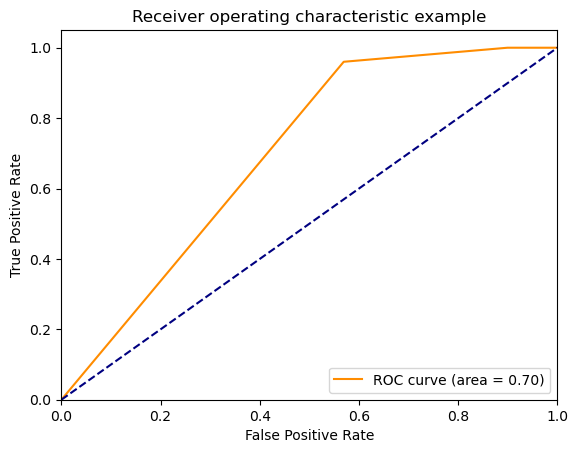

In [19]:
"""1) ROC-кривая позволяет отобразить на одном графике результаты большого числа матриц ошибок (confusion matrix) 
в зависимости от различного уровня порога отсечения бинарных классов (хотя дерево решений может использоваться и для небинарной классификации)

2) ось y - TPR(=Recall=Полнота или Чувствительность=TP/(TP+FN)), на ось x может быть выведен или FPR=1-Specificity=1-TN/(TN+FP), 
или Precision=TP/(TP+FP) - тот или иной показатель используется в зависимости от отсутствия или наличия дисбаланса классов.

3) AUC = area under the curve = интегральный показатель площади под кривой [0;1], AUC=0,5 - дерево не лучше случайного распределения"""

fpr, tpr, thresholds = roc_curve(y_test, predict_proba[:,1])
roc_auc= auc(fpr, tpr)
plt.figure()
plt.plot(fpr, tpr, color='darkorange',
         label='ROC curve (area = %0.2f)' % roc_auc)
plt.plot([0, 1], [0, 1], color='navy', linestyle='--')
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate') 
plt.ylabel('True Positive Rate')  # По сути recoll
plt.title('Receiver operating characteristic example')  
plt.legend(loc="lower right")
plt.show()



[Text(0.5, 0.8333333333333334, 'buggers_were_noticed <= 0.5\nentropy = 0.464\nsamples = 67000\nvalue = [6604, 60396]'),
 Text(0.25, 0.5, 'nearby_system_has_planemo <= 0.5\nentropy = 0.997\nsamples = 4738\nvalue = [2226, 2512]'),
 Text(0.125, 0.16666666666666666, 'entropy = 0.0\nsamples = 42\nvalue = [42, 0]'),
 Text(0.375, 0.16666666666666666, 'entropy = 0.996\nsamples = 4696\nvalue = [2184, 2512]'),
 Text(0.75, 0.5, 'nearby_system_has_planemo <= 0.5\nentropy = 0.367\nsamples = 62262\nvalue = [4378, 57884]'),
 Text(0.625, 0.16666666666666666, 'entropy = 0.0\nsamples = 602\nvalue = [602, 0]'),
 Text(0.875, 0.16666666666666666, 'entropy = 0.332\nsamples = 61660\nvalue = [3776, 57884]')]

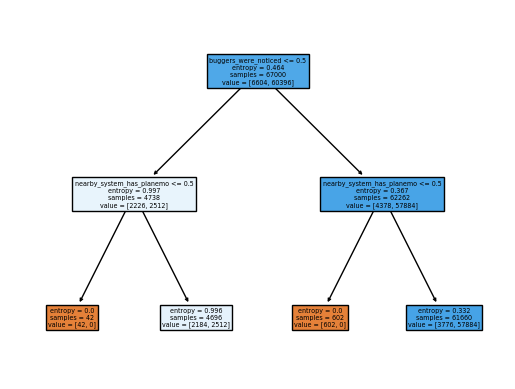

In [20]:
plot_tree(best_clf,filled=True, feature_names=X.columns)

{'criterion': 'gini', 'max_depth': 3, 'n_estimators': 20}

precision_score:  0.9120842131032161
recall_score:     1.0
f1_score:         0.9540209650316076
accuracy_score:   0.9129393939393939

[[  321  2873]
 [    0 29806]] confusion_matrix (TP/FP/TN/FN)

                    features  feature_importances
4       buggers_were_noticed             0.559674
5  nearby_system_has_planemo             0.421549
3         black_hole_is_near             0.014407
1         peradventure_index             0.001715
0                        phi             0.001333
2                  dustiness             0.001322


<Axes: >

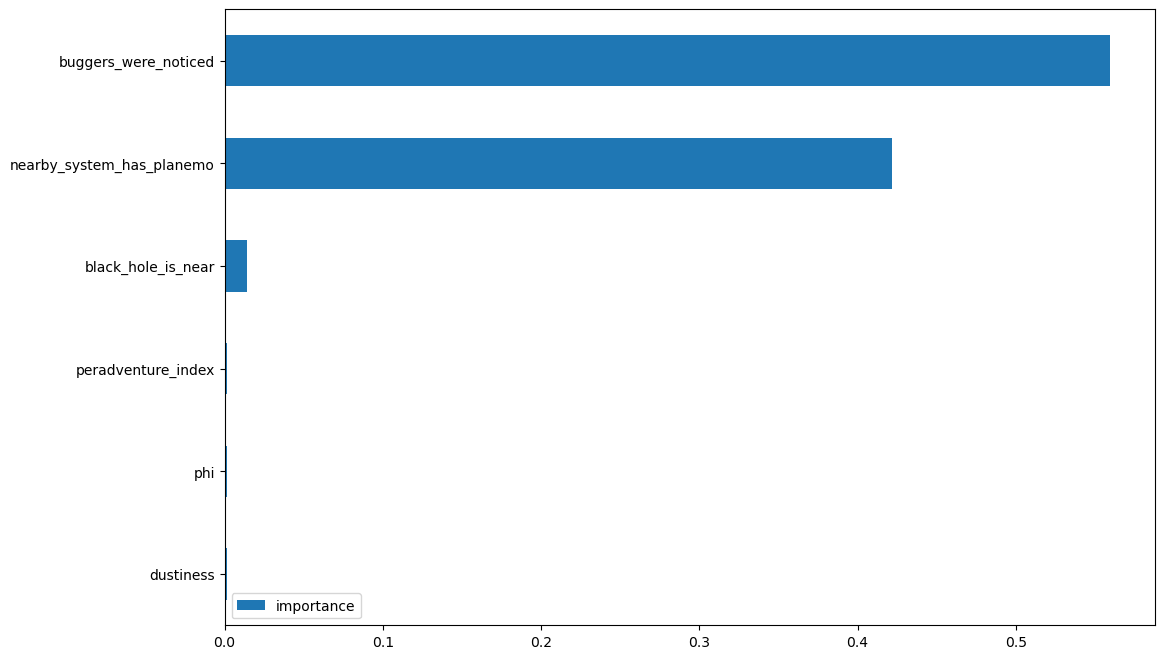

In [21]:
clf_rf = RandomForestClassifier(random_state=0)

parameters = {"criterion": ['gini', 'entropy'], "n_estimators" : range(10, 50, 10), "max_depth" : range(1, 12, 2)}

grid_search_cv_clf = GridSearchCV(clf_rf, parameters, cv=3, n_jobs=-1)  # Для ускорения расчётов в GridSearchCV можно указать n_jobs=-1, чтобы использовать все процессоры
 
grid_search_cv_clf.fit(x_train, y_train)

best_clf = grid_search_cv_clf.best_estimator_

print(grid_search_cv_clf.best_params_)

y_pred = best_clf.predict(x_test) 

print()
print(f'precision_score:  {precision_score(y_test, y_pred)}')
print(f"recall_score:     {recall_score(y_test, y_pred)}")
print(f'f1_score:         {f1_score(y_test, y_pred)}')
print(f'accuracy_score:   {accuracy_score(y_test, y_pred)}')
print()
print(f'{confusion_matrix(y_test, y_pred)} confusion_matrix (TP/FP/TN/FN)') 
print()

feature_importances = best_clf.feature_importances_
feature_importances_df = pd.DataFrame({'features' : list(x_test), 
                                       "feature_importances" : feature_importances})

print(feature_importances_df.sort_values('feature_importances', ascending=False))  # Частота использования переменных по которым наблюдалась максимальная IG (важность переменных для предсказания)

imp = pd.DataFrame(best_clf.feature_importances_, index=x_train.columns, columns=['importance'])  # Графическое представление вжности фичей
imp.sort_values('importance').plot(kind='barh', figsize=(12, 8))


In [22]:
from collections import Counter

Counter(y_pred)

Counter({1: 32679, 0: 321})

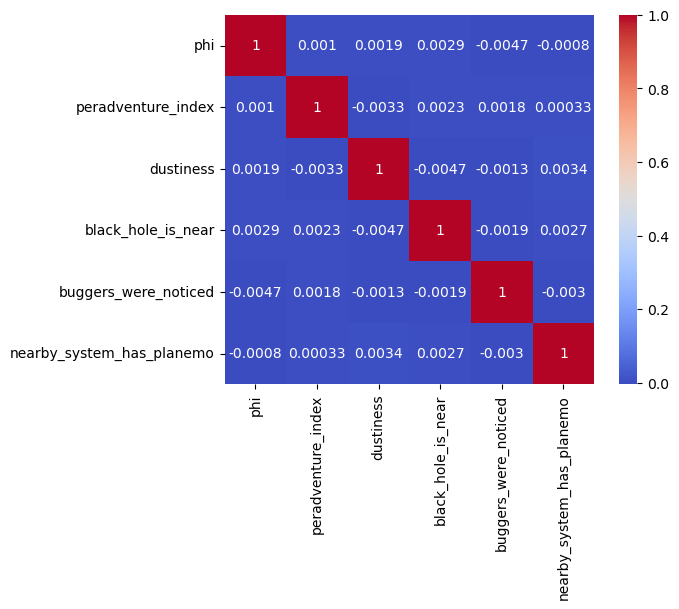

In [23]:
features = X.columns
f,ax = plt.subplots(1,1)
sns.heatmap(X[features].corr(), annot=True, square=True, cmap='coolwarm')
plt.show()
plt.close()